In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv ('Maingames_DS_dataset.csv')
df.head()

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,Character_Facet_Cont_Sympathy,Personal_Values_Facet_Cont_UniversalismTolerance,Temperament_Choleric,Self_Esteem_Cont_SEDiscrepancyResponsibility,Character_Facet_Cont_ArtisticInterests,Temperament_Sanguine,Character_Facet_Cont_Friendliness,Temperament_Diligent,Self_Esteem_Cont_SELevel,Character_Cont_Extraversion,Role_Director,Character_Facet_Cont_SelfConsciousness,Temperament_Energetic,Character_Facet_Cont_Adventurousness,Role_Craftsman,Self_Esteem_Cont_SELevelResponsibility,Self_Esteem_Cont_SEAspirationResponsibility,Role_Toastmaster,Personal_Values_Facet_Cont_PowerDominance,Role_Marshal,Self_Esteem_Cont_SELevelAchievements,Self_Esteem_Cont_SEDiscrepancySociability,Personal_Values_Cont_SelfEnhancement,Self_Esteem_Cont_SEAspiration,Role_Supplier,Character_Facet_Cont_Activity,Temperament_Stable,Personal_Values_Facet_Cont_PowerResources,Self_Esteem_Cont_SEDiscrepancyAchievements,Temperament_Melancholic,Character_Cont_Openness,Character_Facet_Cont_Anxiety,Role_Administrator,Character_Facet_Cont_Emotionality,Role_Innovator,Role_Partygoer,Self_Esteem_Cont_SEAspirationSociability,Role_Guru,...,Self_Esteem_Cont_SEDiscrepancyAppearance,Personal_Values_Facet_Cont_ConformityInterpersonal,Character_Facet_Cont_Modesty,Self_Esteem_Cont_SEDiscrepancyOriginality,Character_Facet_Cont_Imagination,Role_Coach,Role_RightsDefender,Role_Philanthropist,Personal_Values_Facet_Cont_SelfDirectionAction,Role_Promoter,Personal_Values_Facet_Cont_SecurityPersonal,Personal_Values_Facet_Cont_UniversalismConcern,Role_Advisor,Self_Esteem_Cont_SELevelOriginality,Role_Analyst,Personal_Values_Cont_SelfTranscendence,Personal_Values_Facet_Cont_Achievement,Character_Facet_Cont_Trust,Temperament_Unstable,Character_Cont_Agreeableness,Role_Inventor,Personal_Values_Facet_Cont_BenevolenceCaring,Personal_Values_Facet_Cont_BenevolenceDependability,Character_Facet_Cont_Vulnerability,Character_Facet_Cont_ExcitementSeeking,Role_Designer,Role_Deputy,Personal_Values_Cont_OpennessToChange,PaidStarPerWatchedHour.1,Character_Facet_Cont_Morality,Character_Facet_Cont_Depression,Role_Strategist,Role_Inspector,Self_Esteem_Cont_SEAspirationAppearance,Character_Facet_Cont_SelfDiscipline,Self_Esteem_Cont_SEDiscrepancyIntelligence,Role_Companion,Character_Facet_Cont_Cooperation,Role_Commander,Role_Activist,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,ID,Male,MLBB,96751,104,0.004113,0.663442,0.718679,0.288008,0.471456,0.522711,0.337836,0.554134,0.0,0.496688,0.504059,0.25,0.494384,0.125,0.462912,0.474577,0.679339,0.471482,0.125,0.544957,0.453882,0.679427,0.721495,0.530887,0.356304,0.620860,0.605858,0.473335,0.303076,0.881936,0.509514,0.691145,0.750,0.317289,0.544263,0.00,0.519794,0.771031,0.572132,0.663168,0.695563,0.674684,0.720348,0.758008,...,0.606057,0.545425,0.461667,0.556407,0.707490,0.492933,0.717802,0.690938,0.488144,0.674905,0.353928,0.477637,0.577660,0.728769,0.627180,0.275763,0.322608,0.450080,0.500,0.467756,0.705475,0.543155,0.244511,0.686694,0.554406,0.533952,0.516859,0.303909,0.004113,0.553544,0.771031,0.783868,0.670467,0.648751,0.518061,0.473907,0.541372,0.352032,0.449807,0.514417,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,1,ID,Male,8 Ball Pool,4781,174,0.002855,0.543255,0.427887,0.430609,0.493514,0.348513,0.408481,0.610872,0.0,0.557879,0.577758,0.50,0.468738,0.250,0.386516,0.445183,0.381432,0.352964,0.000,0.604113,0.325222,0.743407,0.534425,0.349459,0.341675,0.486200,0.490160,0.579283,0.298714,0.860851,0.098237,0.55

In [3]:
#delete baris yang bernilai - di kolom Total Follower
df.drop(df.index[df['Total Follower'] == '-'], inplace = True)
#delete baris yang bernilai - di kolom Game
df.drop(df.index[df['Game'] == '-'], inplace = True)

In [4]:
df['Total Follower'] = df['Total Follower'].astype(float)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

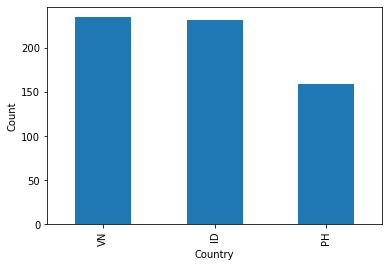

In [5]:
df['Country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

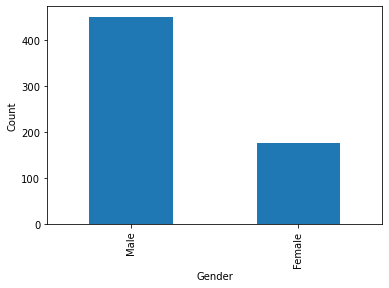

In [6]:
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

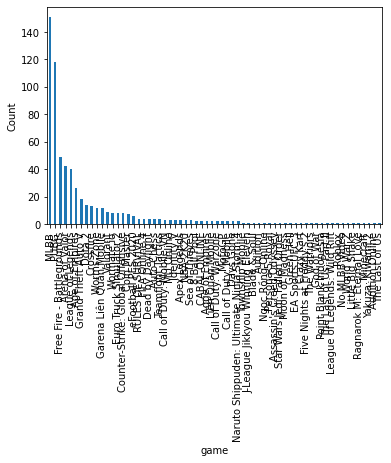

In [7]:
df['Game'].value_counts().plot(kind='bar')
plt.xlabel('game')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

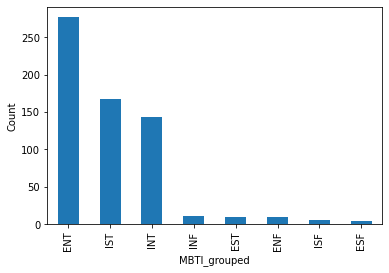

In [8]:
df['MBTI_grouped'].value_counts().plot(kind='bar')
plt.xlabel('MBTI_grouped')
plt.ylabel('Count')
sns.despine

<AxesSubplot:>

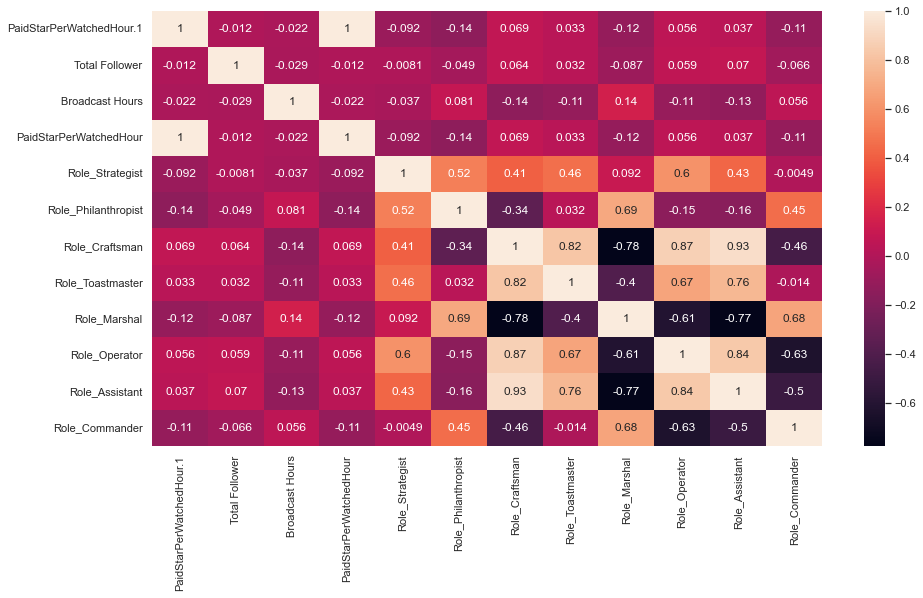

In [9]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df[['PaidStarPerWatchedHour.1','Total Follower', 'Broadcast Hours','PaidStarPerWatchedHour', 'Role_Strategist','Role_Philanthropist',
                'Role_Craftsman','Role_Toastmaster','Role_Marshal','Role_Operator', 'Role_Assistant', 'Role_Commander']].corr(), annot=True)

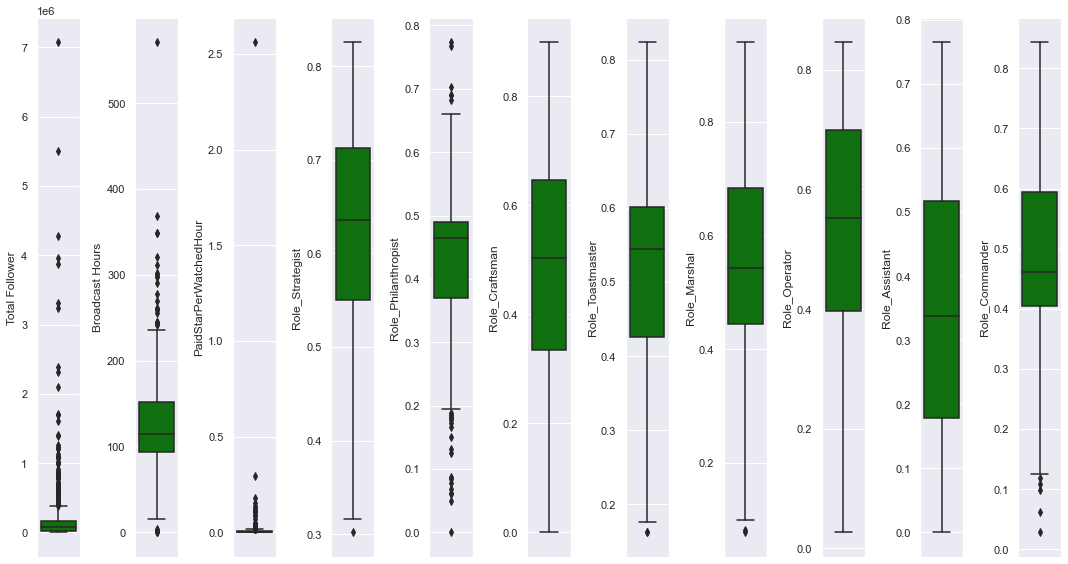

In [10]:

nums= ['Total Follower', 'Broadcast Hours','PaidStarPerWatchedHour', 'Role_Strategist','Role_Philanthropist',
        'Role_Craftsman','Role_Toastmaster','Role_Marshal','Role_Operator', 'Role_Assistant', 'Role_Commander']
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

<Figure size 1440x1080 with 0 Axes>

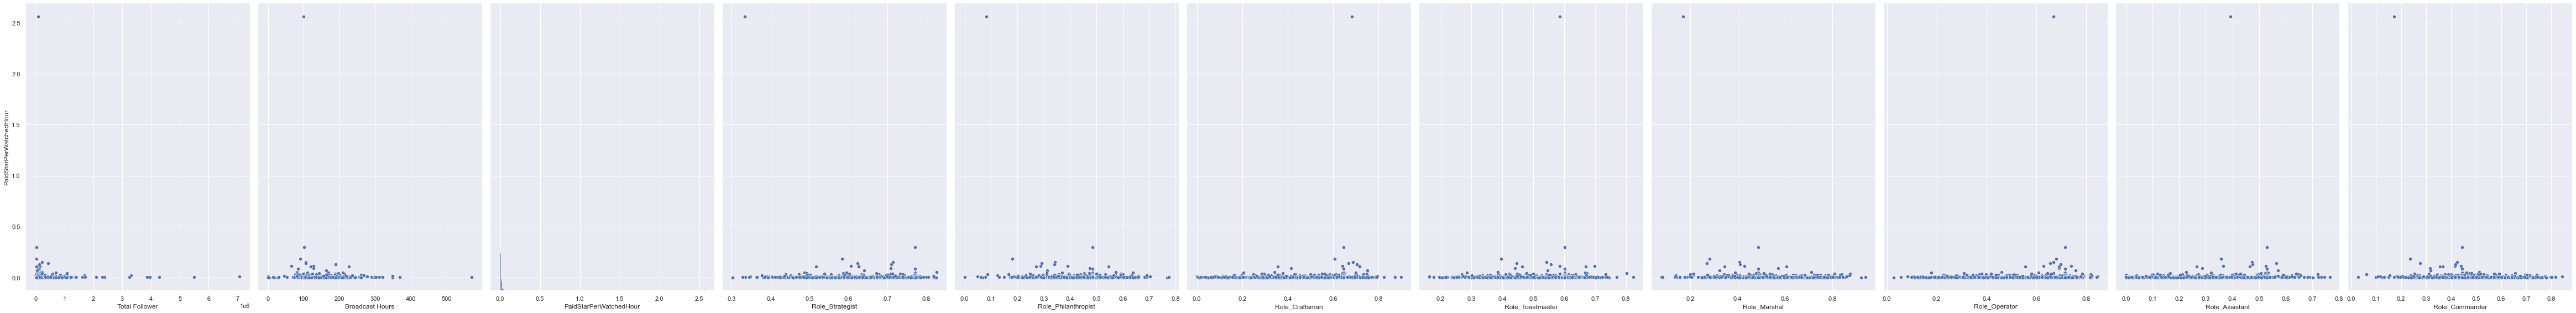

In [11]:
plt.figure(figsize=(20,15))
sns.pairplot(data=df, x_vars=['Total Follower', 'Broadcast Hours','PaidStarPerWatchedHour', 'Role_Strategist','Role_Philanthropist','Role_Craftsman','Role_Toastmaster','Role_Marshal','Role_Operator', 'Role_Assistant', 'Role_Commander'], 
             y_vars=['PaidStarPerWatchedHour'], size=8, aspect=0.75)

In [12]:
df_pre = df.copy()

Q1 = df_pre['PaidStarPerWatchedHour'].quantile(0.25)
Q3 = df_pre['PaidStarPerWatchedHour'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_pre['PaidStarPerWatchedHour'] >= low_limit) & (df_pre['PaidStarPerWatchedHour'] <= high_limit))
df_pre = df_pre[filtered_entries]

In [13]:
features = ['Total Follower', 'Broadcast Hours','PaidStarPerWatchedHour','Role_Director','Role_Supplier', 'Role_Administrator','Role_Innovator', 
            'Role_Partygoer','Role_Guru', 'Role_Guardian', 'Role_Keeper', 'Role_Manager', 'Role_WiseMan', 'Role_Healer', 'Role_Coach', 'Role_RightsDefender',
            'Role_Promoter','Role_Advisor','Role_Analyst', 'Role_Designer', 'Role_Deputy', 'Role_Inspector', 'Role_Companion','Role_Activist','Role_Charismatic',
            'Role_Curator', 'Role_Strategist','Role_Philanthropist','Role_Craftsman','Role_Toastmaster','Role_Marshal','Role_Operator', 'Role_Assistant', 'Role_Commander']

for var in features:
    df_pre[var]= (df[var]+1).apply(np.log)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    df_pre[var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [14]:
df_pre.head()

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,Character_Facet_Cont_Sympathy,Personal_Values_Facet_Cont_UniversalismTolerance,Temperament_Choleric,Self_Esteem_Cont_SEDiscrepancyResponsibility,Character_Facet_Cont_ArtisticInterests,Temperament_Sanguine,Character_Facet_Cont_Friendliness,Temperament_Diligent,Self_Esteem_Cont_SELevel,Character_Cont_Extraversion,Role_Director,Character_Facet_Cont_SelfConsciousness,Temperament_Energetic,Character_Facet_Cont_Adventurousness,Role_Craftsman,Self_Esteem_Cont_SELevelResponsibility,Self_Esteem_Cont_SEAspirationResponsibility,Role_Toastmaster,Personal_Values_Facet_Cont_PowerDominance,Role_Marshal,Self_Esteem_Cont_SELevelAchievements,Self_Esteem_Cont_SEDiscrepancySociability,Personal_Values_Cont_SelfEnhancement,Self_Esteem_Cont_SEAspiration,Role_Supplier,Character_Facet_Cont_Activity,Temperament_Stable,Personal_Values_Facet_Cont_PowerResources,Self_Esteem_Cont_SEDiscrepancyAchievements,Temperament_Melancholic,Character_Cont_Openness,Character_Facet_Cont_Anxiety,Role_Administrator,Character_Facet_Cont_Emotionality,Role_Innovator,Role_Partygoer,Self_Esteem_Cont_SEAspirationSociability,Role_Guru,...,Self_Esteem_Cont_SEDiscrepancyAppearance,Personal_Values_Facet_Cont_ConformityInterpersonal,Character_Facet_Cont_Modesty,Self_Esteem_Cont_SEDiscrepancyOriginality,Character_Facet_Cont_Imagination,Role_Coach,Role_RightsDefender,Role_Philanthropist,Personal_Values_Facet_Cont_SelfDirectionAction,Role_Promoter,Personal_Values_Facet_Cont_SecurityPersonal,Personal_Values_Facet_Cont_UniversalismConcern,Role_Advisor,Self_Esteem_Cont_SELevelOriginality,Role_Analyst,Personal_Values_Cont_SelfTranscendence,Personal_Values_Facet_Cont_Achievement,Character_Facet_Cont_Trust,Temperament_Unstable,Character_Cont_Agreeableness,Role_Inventor,Personal_Values_Facet_Cont_BenevolenceCaring,Personal_Values_Facet_Cont_BenevolenceDependability,Character_Facet_Cont_Vulnerability,Character_Facet_Cont_ExcitementSeeking,Role_Designer,Role_Deputy,Personal_Values_Cont_OpennessToChange,PaidStarPerWatchedHour.1,Character_Facet_Cont_Morality,Character_Facet_Cont_Depression,Role_Strategist,Role_Inspector,Self_Esteem_Cont_SEAspirationAppearance,Character_Facet_Cont_SelfDiscipline,Self_Esteem_Cont_SEDiscrepancyIntelligence,Role_Companion,Character_Facet_Cont_Cooperation,Role_Commander,Role_Activist,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,ID,Male,MLBB,0.580948,0.733007,0.256123,0.663442,0.718679,0.288008,0.471456,0.522711,0.337836,0.554134,0.0,0.496688,0.504059,0.25,0.494384,0.125,0.462912,0.474577,0.894599,0.471482,0.125,0.544957,0.583403,0.679427,0.721495,0.611583,0.356304,0.694229,0.605858,0.473335,0.303076,0.881936,0.811078,0.691145,0.750,0.317289,0.544263,0.00,0.519794,0.771031,0.603523,0.663168,0.724400,0.854905,0.720348,0.957419,...,0.606057,0.545425,0.461667,0.556407,0.707490,0.753863,0.867288,0.916716,0.488144,0.803496,0.353928,0.477637,0.746244,0.728769,0.653653,0.275763,0.322608,0.450080,0.500,0.467756,0.705475,0.543155,0.244511,0.686694,0.554406,0.557329,0.697647,0.303909,0.004113,0.553544,0.771031,0.934057,0.739307,0.648751,0.518061,0.473907,0.726799,0.352032,0.588663,0.689985,0.523116,0.493364,0.318747,0.684412,0.494384,0.751974,0.950007,0.299052,0.803920,0.625
1,1,ID,Male,8 Ball Pool,0.287349,0.813462,0.177916,0.543255,0.427887,0.430609,0.493514,0.348513,0.408481,0.610872,0.0,0.557879,0.577758,0.50,0.468738,0.250,0.386516,0.445183,0.390203,0.352964,0.000,0.604113,0.438959,0.743407,0.534425,0.331329,0.341675,0.546642,0.490160,0.579283,0.298714,0.860

In [18]:
x = df_pre.drop(columns=['Unnamed: 0','PaidStarPerWatchedHour','PaidStarPerWatchedHour.1','Country','Gender', 'Game', 'MBTI_grouped']) # menggunakan semua feature kecuali target
y = df_pre['PaidStarPerWatchedHour']

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=42) #Splitting the data into Train and Test

# Fit Model Simple Linear Regression

In [20]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predict the set test

In [21]:
pred = regressor.predict(xtest) #Predicting the PaidStarPerWatchedHour

## Evaluation

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [23]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [ 1.61421244e-02  2.18453756e-01 -5.40182220e-01  2.36397675e-01
  5.31390642e-02  5.83568589e-02  1.56762400e+00 -1.96162666e-01
 -1.96575390e-02  1.83460869e+12 -3.66432677e-02  5.07743205e-01
 -1.24706201e+13 -6.80457113e-01 -8.04780007e+12 -3.46241572e-02
  3.87926984e+00 -2.55051483e+00  8.48839266e-03  1.06360114e+13
  6.99950580e-01  3.25498227e+00  1.35666676e-01 -3.60257830e-02
 -6.80939477e+00  1.31340434e-01 -1.26061620e+00  9.21432272e-02
  2.25845990e-01  4.74916109e+00 -1.46290441e-01 -7.23225412e+00
 -4.25242042e-01  2.46141336e+12 -2.73675868e+00  1.39433201e-01
 -1.96140666e+12  6.86350819e-01 -5.96449172e-02  6.88538699e+00
  1.55966059e-01 -4.98924003e-01 -1.61115975e+00  1.76694576e-01
 -3.11078237e+00  1.04501075e-01  1.00092067e+13 -2.07109908e-01
 -3.11098262e-01 -4.30250867e+00 -3.05550116e-01  3.25020213e-01
  2.02925269e-01 -1.08134064e-01 -1.42385854e-01  1.88500522e+00
  4.83996216e-02 -5.32631115e+00 -4.45074525e-03  1.38636939e+00
 -1.98687

In [24]:
print("train Accuracy : ",regressor.score(xtrain,ytrain))
print("test Accuracy : ",regressor.score(xtest,ytest))

train Accuracy :  0.26022215877688404
test Accuracy :  -0.46332497782376025


### Ridge

In [25]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

pred = ridge_model.predict(xtest)
eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.17
RMSE: 0.21
R2 score: 0.09


In [26]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [27]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.18
RMSE: 0.22
R2 score: 0.02


In [28]:
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best solver: cholesky
Best alpha: 250


# Lasso

In [29]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.18
RMSE: 0.22
R2 score: -0.01


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.18
RMSE: 0.22
R2 score: -0.01


## Elastic

In [31]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.18
RMSE: 0.22
R2 score: -0.01


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [33]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.18
RMSE: 0.22
R2 score: -0.01


## decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.19
RMSE: 0.26
R2 score: -0.45


# Random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.17
RMSE: 0.21
R2 score: 0.07


## Support Vector Regressor

In [36]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.16
RMSE: 0.21
R2 score: 0.08
